In [2]:
%pip install numpy tensorflow


     -------------------------------------- 375.7/375.7 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 6.8 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 71.9/71.9 kB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 9.4 MB/s eta 0:00:00
     -------------------------------------- 277.0/277.0 kB 8.3 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 8.5 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     -------------------------------------- 209.7/209.7 kB 6.4 MB/s eta 0:00:00
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
     -------------------------------------- 296.5/296.5 kB 6.1 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
  Attempt

In [32]:
#Importing Libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [6]:
#Fetch Images count from Fodlers

In [34]:
count = 0 
dirs = os.listdir('D:/flower_recognition/Images')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Images Folder has 4317 Images


In [35]:
#Load Images into Arrays as Dataset

In [36]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [37]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [38]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [39]:
import matplotlib.pyplot as plt

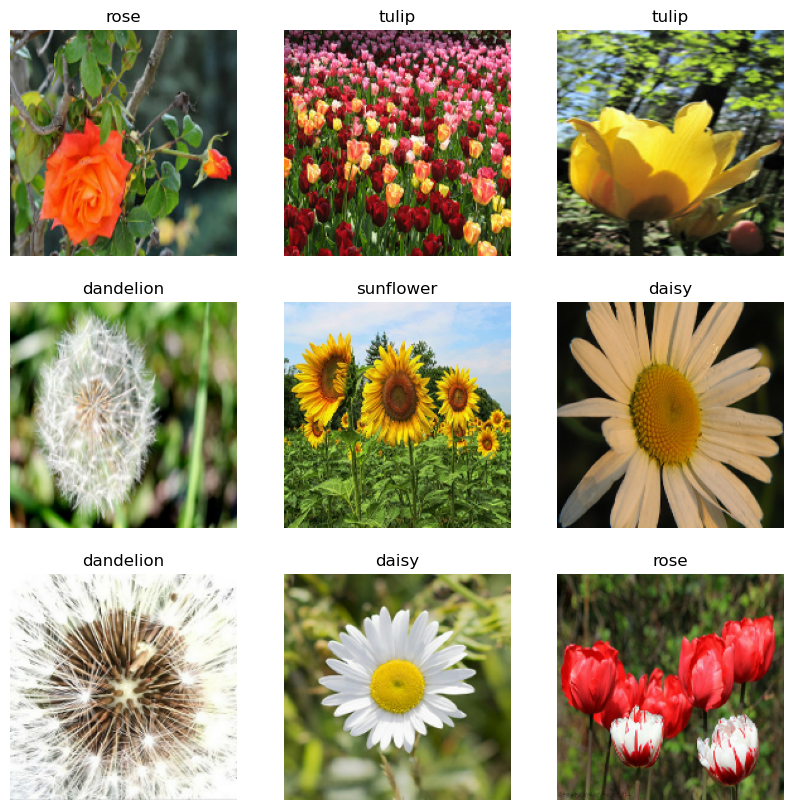

In [40]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [41]:
AUTOTUNE = tf.data.AUTOTUNE

In [42]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [43]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [44]:
#Data Augmentation

In [45]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

c:\Users\syejjala\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


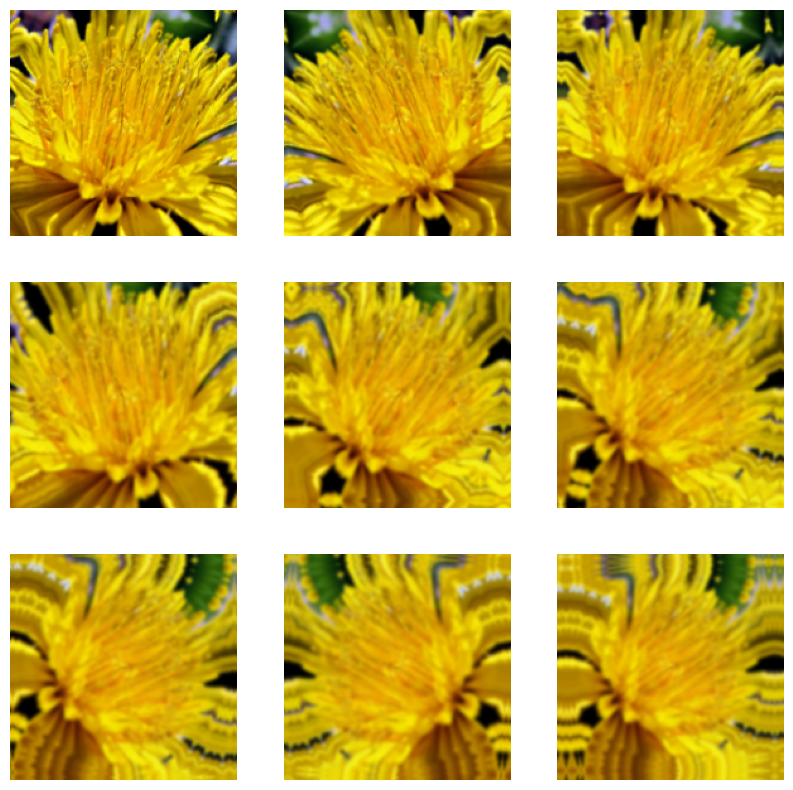

In [46]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [47]:
#MOdel Creation

In [48]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [49]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 186ms/step - accuracy: 0.3484 - loss: 1.5256 - val_accuracy: 0.5017 - val_loss: 1.1720
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.5670 - loss: 1.0809 - val_accuracy: 0.5747 - val_loss: 1.0194
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 194ms/step - accuracy: 0.6149 - loss: 0.9850 - val_accuracy: 0.6419 - val_loss: 0.9029
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - accuracy: 0.6604 - loss: 0.8840 - val_accuracy: 0.6107 - val_loss: 0.9820
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - accuracy: 0.6619 - loss: 0.8595 - val_accuracy: 0.6547 - val_loss: 0.8540
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.6855 - loss: 0.8180 - val_accuracy: 0.6813 - val_loss: 0.8396
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 211ms/step - accuracy: 0.6955 - loss: 0.7811 - val_accuracy: 0.6837 - val_loss: 0.7995
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 214ms/step - accuracy: 0.7183 - loss: 0

In [52]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [53]:
# classify_images('D:/flower_recognition/sample/rose.jpg')
# classify_images('D:/flower_recognition/sample/sunflower.jpg')
classify_images("D:/flower_recognition/sample/diasy_flowe.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


'The Image belongs to daisy with a score of 99.99998807907104'

In [54]:
model.save('Flower_Recog_Model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('Flower_Recog_Model.h5')

loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8918 - loss: 0.3138
Validation Accuracy: 89.35%
